## Protoyping choropleth classification schemes from PySAL for use with GeoPandas


Under the hood, if PySAL is not available or if an unsupported classification scheme is specified, the choropleth classification would fall back to GeoPandas defaults.

In [2]:
%matplotlib inline
import geopandas as gpd

In [9]:
# we use PySAL for loading a test shapefile
# replace this cell if you have a local shapefile and want to use GeoPandas readers
import pysal as ps 
pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)
tracts.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.685274124145508 13.63951969146729,..."


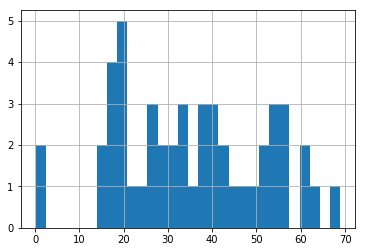

In [16]:
# Let's take a look at how the CRIME variable is distributed
# with a histogram first
tracts['CRIME'].hist(bins=30)

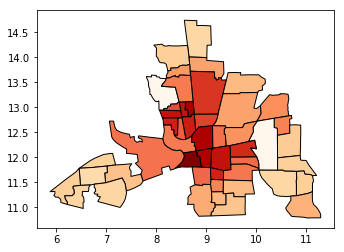

In [4]:
# Now let's see what it looks like without a classification scheme
tracts.plot(column='CRIME', cmap='OrRd', edgecolor='k')

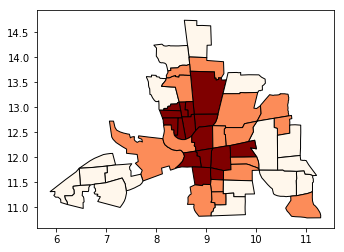

In [5]:
# Now with scheme by quantiles
tracts.plot(column='CRIME', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k')

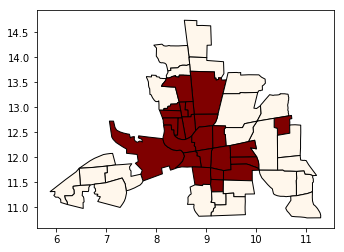

In [7]:
tracts.plot(column='CRIME', scheme='quantiles', k=2, cmap='OrRd', edgecolor='k')

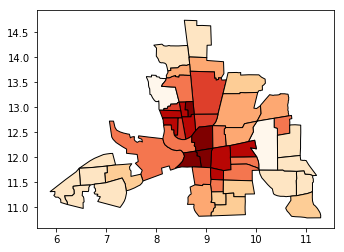

In [6]:
tracts.plot(column='CRIME', scheme='fisher_jenks', k=8, cmap='OrRd', edgecolor='k')

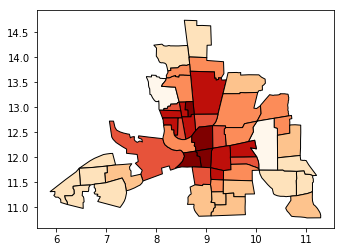

In [7]:
tracts.plot(column='CRIME', scheme='equal_interval', k=7, cmap='OrRd', edgecolor='k')

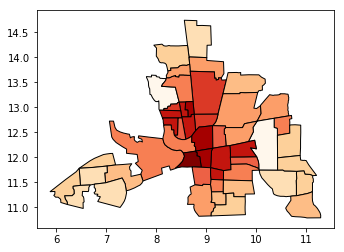

In [8]:
tracts.plot(column='CRIME', scheme='equal_interval', k=12, cmap='OrRd', edgecolor='k')

## Notes

This is only using a subset of the classifiers in PySAL. specifically those that take only an attribute and a value of k as an argument. This simplifies the number of new default parameters that would be required in GeoPandas.DataFrame.plot().

It is of course possible to add other classifiers with the cost of additional kw args.